<a href="https://colab.research.google.com/github/Salma-Jamal/Image-Processing/blob/main/FilteringApproaches/PeriodicNoiseRemoval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Imports**

In [ ]:
import cv2
from matplotlib import pyplot as plt
from scipy import fftpack
import numpy as np
from google.colab.patches import cv2_imshow

#**Read Image**
- **read_image:** A method that takes path of the image to read, resize and convert it to grayscale.
- **show_image:** A method that takes an image then show it.

In [ ]:
def read_image(path):
  """
  function to read, resize and convert image to grayscale 
  """
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  image = cv2.resize(image, (512, 512))
  return image

In [ ]:
def show_image(image,title):
  """
  function to show image
  """
  plt.figure(figsize=(9,9))
  plt.imshow(image, plt.cm.gray)
  plt.title(title)
  plt.axis("off");

In [ ]:
image = read_image("/content/space.jpg")

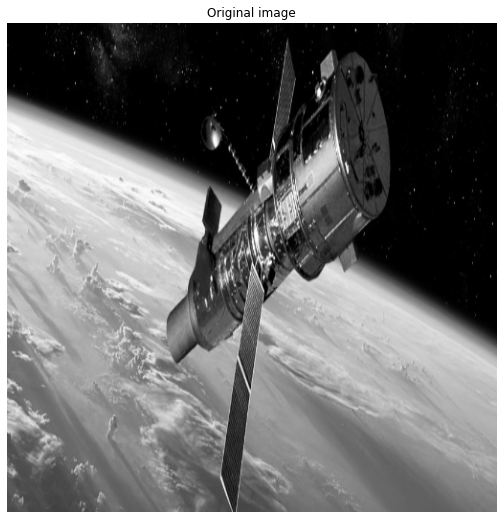

In [ ]:
show_image(image,'Original image')

#**Add Periodic Noise to an image**

In [ ]:
def Add_Periodic_Noise(image):
  """
  function to add Periodic noise to an image
  """
  x , y = np.meshgrid(range(0, image.shape[0]), range(0, image.shape[1]))
  S = 1 + np.sin(x + y / 1.5);
  noisy_image = ((image)/ 128 + S)/4;
  return noisy_image

In [ ]:
image_periodic_noise = Add_Periodic_Noise(image)

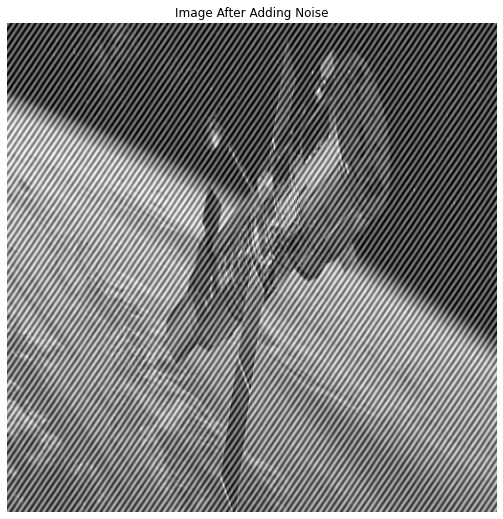

In [ ]:
show_image(image_periodic_noise,'Image After Adding Noise')

#**Apply Notch Fitler**
- convert image to frequency domain by fourier transform
- Apply Notch filter
- Inverse image from fourier transform

**Convert image to frequency domain (Fourier Transform)** 

In [ ]:
image_fourierTransform = fftpack.fft2(image_periodic_noise)

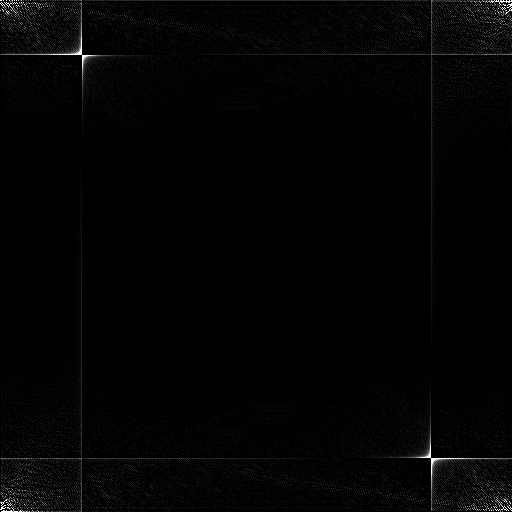

In [ ]:
cv2_imshow(image_fourierTransform.real)

In [ ]:
def Notch_Filter(image):
  """
  Apply notch fitler to an image
  """
  w, h = image.shape
  image[int(w*0.1):int(w*(1-0.1))] = 0
  image[:, int(h*0.1):int(h*(1-0.1))] = 0
  return image

In [ ]:
image_NotchFilter = Notch_Filter(image_fourierTransform)

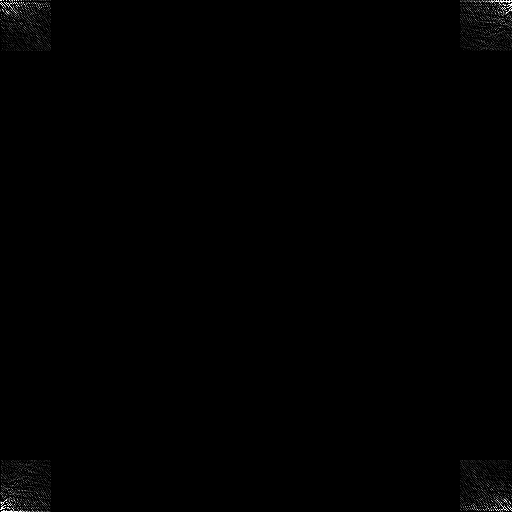

In [ ]:
cv2_imshow(image_NotchFilter.real)

**Inverse Image From Fourier Transform to get Final Image**

In [ ]:
image_inverse_FourierTransfrom = fftpack.ifft2(image_NotchFilter).real

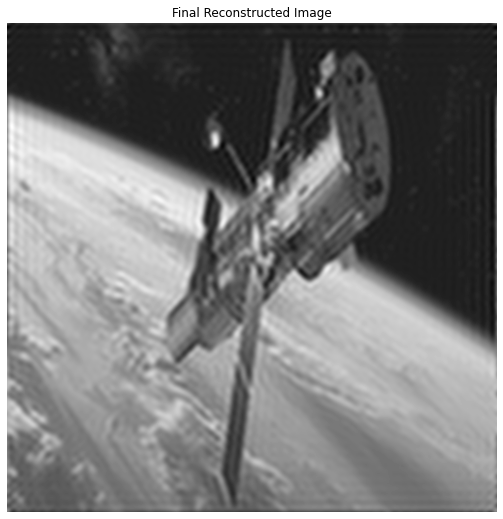

In [ ]:
show_image(image_inverse_FourierTransfrom,'Final Reconstructed Image')

#**Apply the steps on another image**

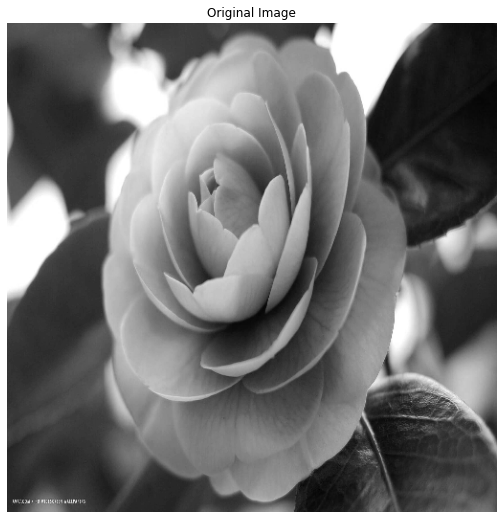

In [ ]:
image2 = read_image('/content/flower.jpg')
show_image(image2,'Original Image')

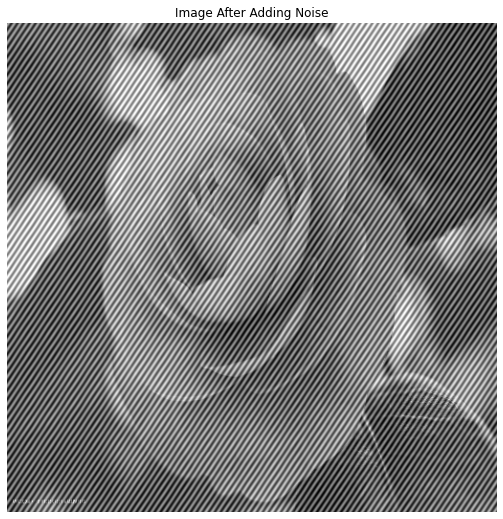

In [ ]:
image_p_n = Add_Periodic_Noise(image2)
show_image(image_p_n,'Image After Adding Noise')

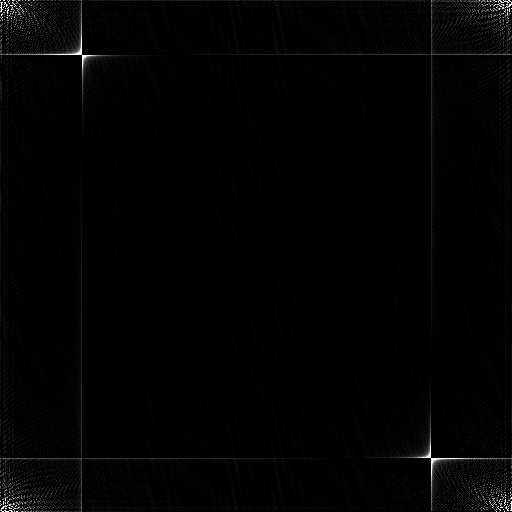

In [ ]:
image_f_T = fftpack.fft2(image_p_n)
cv2_imshow(image_f_T.real)

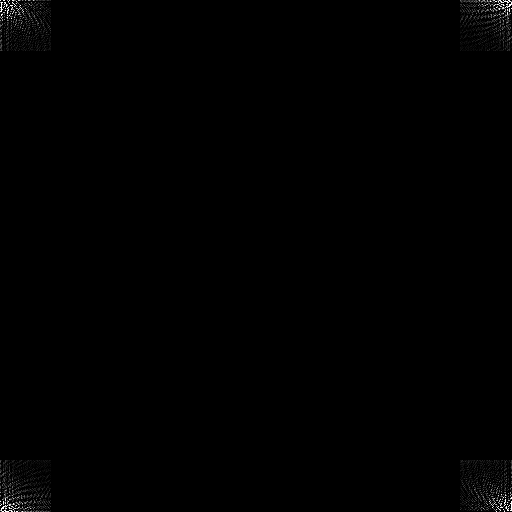

In [ ]:
image_NF = Notch_Filter(image_f_T)
cv2_imshow(image_NF.real)

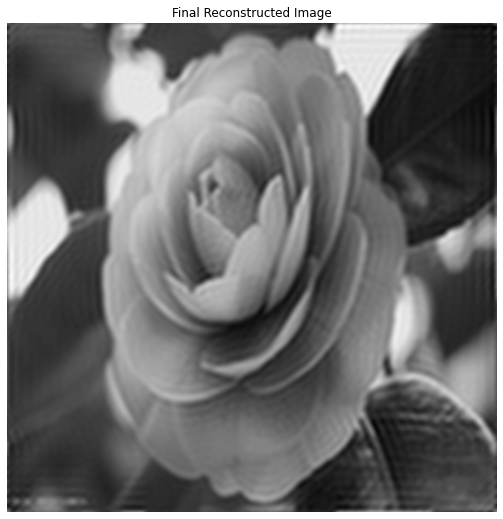

In [ ]:
inverse_FT= fftpack.ifft2(image_NF).real
show_image(inverse_FT,'Final Reconstructed Image')